# <p style='font-family: https://fonts.google.com/share?selection.family=Signika+Negative:wght@300..700; background-color:#D1C4E9; font-weight:bold; color:#673AB7; border:4px solid #673AB7; border-radius:12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2); padding:10px; text-align:center; transition: all 0.3s ease;'>👤 Unsupervised Fraud Detection : Money Laundry Pattern 😈</p>

In [24]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# LOAD DATA
devices = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\devices.csv')
credit_cards = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\credit_cards.csv')
bank_accounts = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\bank_accounts.csv')
transactions = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\transactions.csv')

transactions

C:\Users\aliff\AppData\Local\Temp\ipykernel_20072\3392142081.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  bank_accounts = pd.read_csv(r'C:\Python Data Analysis\Fraud Detection\data\data\bank_accounts.csv')


,transid,org_user_id,dest_user_id,amount
0,1953278092,C47388162,C20822974,99094
1,1953295120,C26855196,C16416890,52714
2,1953306402,C121296714,C28477978,43888
3,1953314712,C131221930,C72837912,45771
4,1953381964,C183398314,C28423332,96840
...,...,...,...,...
620942,1956636054,C14222102,C70940136,54658
620943,1956642760,C2978154,C60766142,26739
620944,1956651496,C221974772,C15541938,42036
620945,1956660812,C152533590,C80986700,66580


In [4]:
# BUILD GRAPH

G = nx.DiGraph()

for idx, row in transactions.iterrows():
    G.add_edge(row['org_user_id'], row['dest_user_id'], weight = row['amount'])

print(f'Number of Edge : {G.number_of_edges()}')
print(f'Number of Node : {G.number_of_nodes()}')

Number of Edge : 576062
Number of Node : 486277


In [8]:
# DISPLAY EXAMPLE GRAPH
list(G.edges(data = True))[:5]

[('C47388162', 'C20822974', {'weight': 99094}),
 ('C26855196', 'C16416890', {'weight': 52714}),
 ('C26855196', 'C65274666', {'weight': 80052}),
 ('C121296714', 'C28477978', {'weight': 43888}),
 ('C121296714', 'C19924282', {'weight': 54884})]

<h4> Identifing Money Laundring Patterns: </h4>

<ol>
    <li>Multiple small accounts transferring to a single large account (Smurfing)</li>
    <li>A single account sending funds to multiple smaller accounts (Layering/Distribution)</li>
    <li>Cyclical transactions between accounts (Looping)</li>
</ol>

In [14]:
# SMURFING DETECTION  : nodes with high in-degree and low out-degree.

in_degree = G.in_degree()
out_degree = G.in_degree()

# FIND NODES (USER IDS) WITH AN IN-DEGREE GREATER THAN 10 AND AN OUT-DEGREE LESS THAN OR EQUAL TO 2.
smurfing_node = [n for n in G.nodes() if G.in_degree(n) >= 10 and G.out_degree(n) <= 2]
print(f'The Number of Node Detected as Smurfing Account is {len(smurfing_node)} User')

The Number of Node Detected as Smurfing Account is 9726 User


In [22]:
# LAYERING DETECTION : Nodes with high out-degree connected to many small accounts

layering_node = [n for n in G.nodes() if G.out_degree(n) >= 10 and G.in_degree(n) <= 2]
print(f'The Number of Node Detected as Layering Distribution (Massive Transfer to other Account) : {len(layering_node)}')

The Number of Node Detected as Layering Distribution (Massive Transfer to other Account) : 778


In [23]:
# CYCLES DETECTION : Transaction Cycles between accounts (Indicating Money Circulation)

cycles = list(nx.simple_cycles(G))
print(f'Number of Cyles Transaction (2 user transfer to each other) : {len(cycles)}')

# CHECK USER WHO DID CYCLES TRANSACTION
cycles

Number of Cyles Transaction (2 user transfer to each other) : 22


[['C55504988', 'C161089746'],
 ['C101619778', 'C53758750'],
 ['C41132868', 'C18016048'],
 ['C11870700', 'C9061644'],
 ['C158045596', 'C10595608'],
 ['C79625830', 'C82976074'],
 ['C163260544', 'C24392848'],
 ['C197254380', 'C42062788'],
 ['C1412592', 'C70551126'],
 ['C134533348', 'C6774336'],
 ['C120189934', 'C124193050'],
 ['C144394044', 'C65466516'],
 ['C20044624', 'C66207098'],
 ['C174221764', 'C60937930'],
 ['C31398560', 'C96879014'],
 ['C16856458', 'C50916742'],
 ['C63437634', 'C69046994'],
 ['C27897426', 'C174993608'],
 ['C93484310', 'C32417068'],
 ['C193350172', 'C224296274'],
 ['C41894952', 'C177526500'],
 ['C39975130', 'C107195354']]

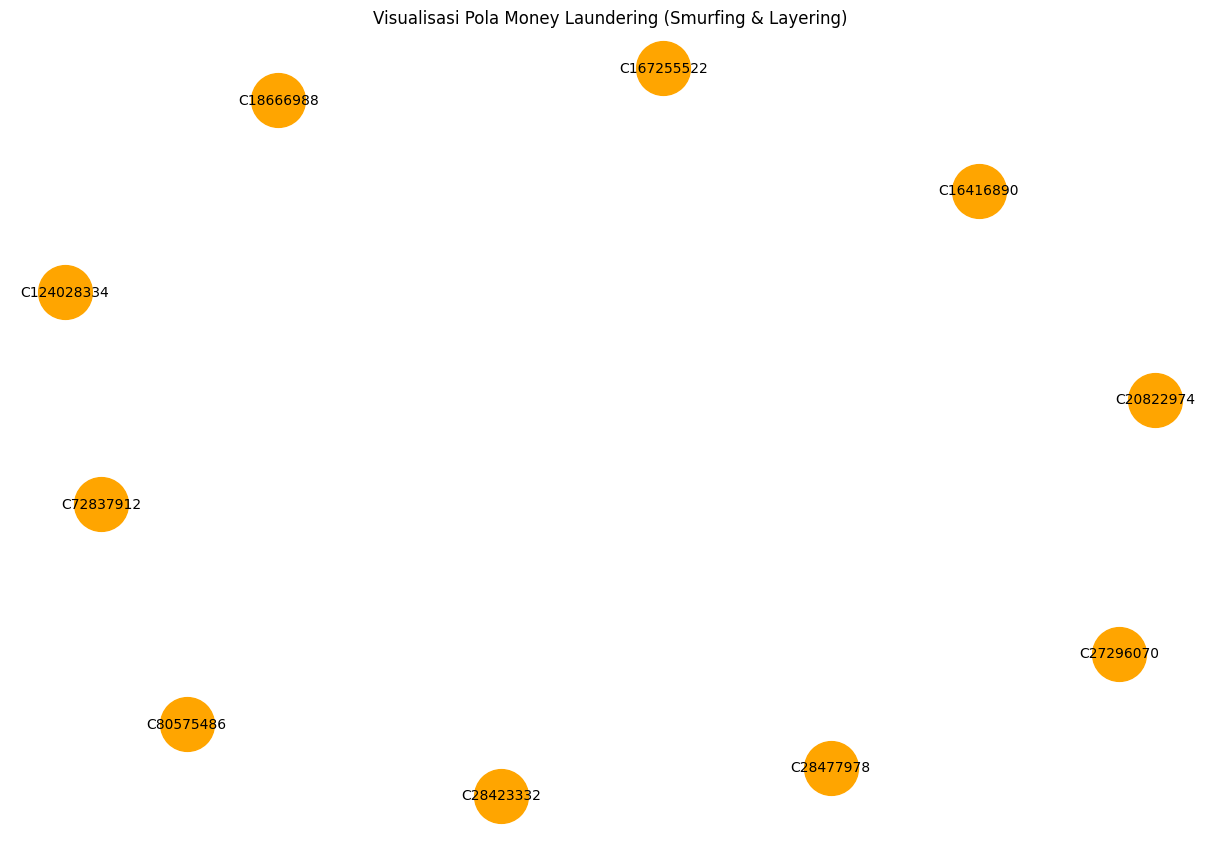

In [ ]:
# VISUALIZE MONEY LAUNDRING PATTERN

suspicious_nodes = set(smurfing_node[:5] + layering_node[:5])
subgraph = G.subgraph(suspicious_nodes)


plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph, seed=42)

nx.draw(subgraph, pos, with_labels=True, node_color='orange', node_size=1500, font_size=10, edge_color='gray')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels={(u,v):d['weight'] for u,v,d in subgraph.edges(data=True)}, font_size=8)

plt.title("Visualisasi Pola Money Laundering (Smurfing & Layering)")
plt.show()